# Illumina exome sequencing 

Here we visualize Illumina exome sequencing data for the [GNAS gene](https://www.ncbi.nlm.nih.gov/gene/14683). The sequencing data was generated from the HG002 individual from the [Genome in a Bottle](https://www.nist.gov/programs-projects/genome-bottle) cohort. 

Data sources:
- Illumina exome sequencing: [URL](ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/OsloUniversityHospital_Exome/151002_7001448_0359_AC7F6GANXX_Sample_HG002-EEogPU_v02-KIT-Av5_AGATGTAC_L008.posiSrt.markDup.bam)
- Gene annotation: [URL](https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh37_latest/refseq_identifiers/GRCh37_latest_genomic.gff.gz)

In [1]:
import gzip
import numpy as np
import lakeview as lv

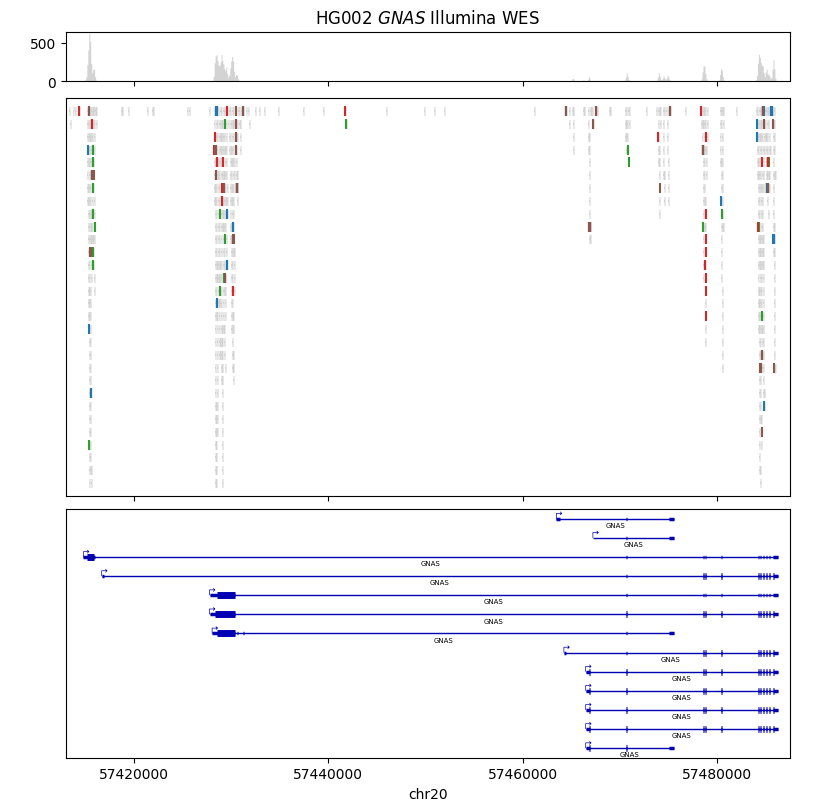

In [2]:
CHROMOSOME, START, END  = "20", 57_413_000, 57_487_500
EXON_BAM_PATH = "../../tests/data/HG002_GNAS_Illumina_WES.bam"
REFSEQ_GFF_PATH = "../../tests/data/Refseq_GRCh37_genomic_annotation.gff.gz"

alignment_painter = lv.SequenceAlignment.from_file(EXON_BAM_PATH, region=(CHROMOSOME, (START, END)))

with gzip.open(REFSEQ_GFF_PATH, "rt") as f:
    annotation_painter = lv.GeneAnnotation.from_refseq(
        f, region=("NC_000020.10", (START, END))
    )

gv = lv.GenomeViewer(3, height_ratios=(1, 8, 5), figsize=(8, 8))
alignment_painter.draw_pileup(gv.axes[0], show_mismatches=False, window_size=100)
random_number_generator = np.random.default_rng(0)
alignment_painter.draw_alignment(
    gv.axes[1], 
    filter_by=lambda _: random_number_generator.random() < 0.05,
    show_mismatches=True, show_arrowheads=False, show_hard_clippings=False, show_soft_clippings=False, max_rows=30
)
annotation_painter.draw_transcripts(gv.axes[2])
gv.set_xlabel("chr20")
gv.set_xlim(START, END)
gv.set_title("HG002 $\it{GNAS}$ Illumina WES")

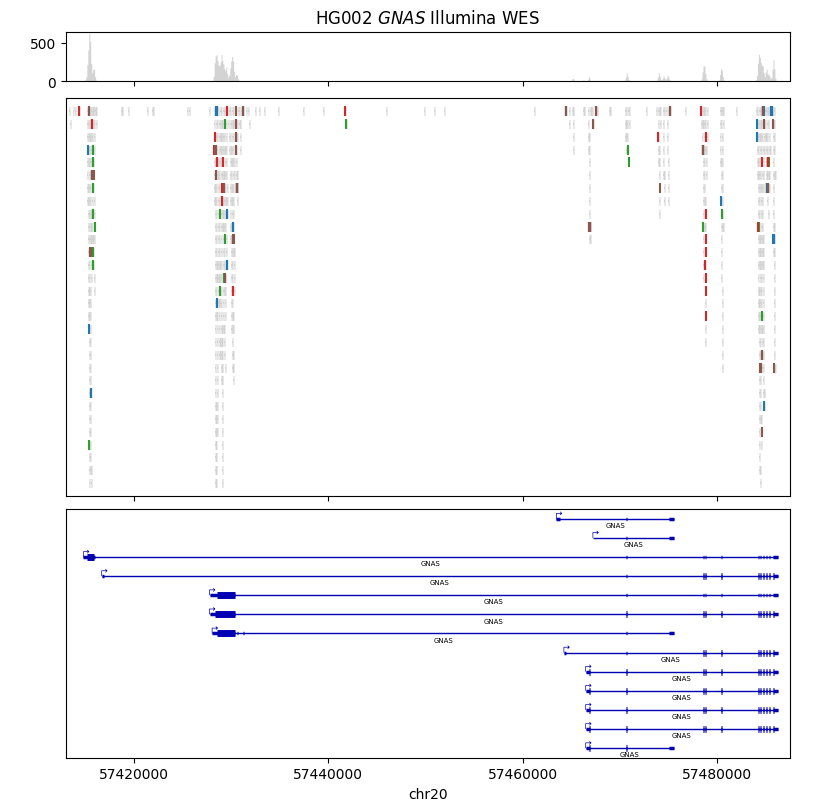

In [3]:
gv.figure